In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
dummy_file_path = '../data/clean_dummy_data.csv'
dummy_data = pd.read_csv(dummy_file_path) 

# Choose target and features
y = dummy_data['Temperature (C)']
dummy_features = ['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'day', 'month', 'year', 'hour']
X = dummy_data[dummy_features]


# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

Train the model using RandomForest.

The column Formatted Date should be converted to float to proceed! (done)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
weather_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, weather_preds))

1.3348218139762056


The data can be used for training and validation. MAE = 1.358999976

In [55]:
# Debug
# print(val_X.sort_values(by=['year','month','day','hour']).head().to_markdown())
print(val_X.head().to_markdown())
print(val_y.head())
for i in range(0,5):
    print(weather_preds[i])


|       |   Humidity |   Wind Speed (km/h) |   Wind Bearing (degrees) |   Visibility (km) |   Loud Cover |   Pressure (millibars) |   day |   month |   year |   hour |
|------:|-----------:|--------------------:|-------------------------:|------------------:|-------------:|-----------------------:|------:|--------:|-------:|-------:|
|  6119 |       0.93 |              3.5581 |                      273 |           15.8263 |            0 |                1013.12 |    19 |       5 |   2006 |     22 |
| 51443 |       0.72 |             16.0678 |                      329 |           11.27   |            0 |                1021.1  |    20 |      10 |   2011 |     10 |
| 18754 |       0.61 |              7.5831 |                        9 |            9.982  |            0 |                1018.37 |    28 |       8 |   2008 |      8 |
| 34070 |       0.87 |              8.05   |                       70 |            3.542  |            0 |                1019    |    26 |      10 |   2009 |  

Find the best leaf node
- 50000 gave the best result but there is not much difference between 10000 and 50000
- Default value gets better results

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    forest_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    forest_model.fit(train_X, train_y)
    preds_val = forest_model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [50000,150000,400000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 50000  		 Mean Absolute Error:  1.789830
Max leaf nodes: 150000  		 Mean Absolute Error:  1.789384
Max leaf nodes: 400000  		 Mean Absolute Error:  1.789384


Visualization

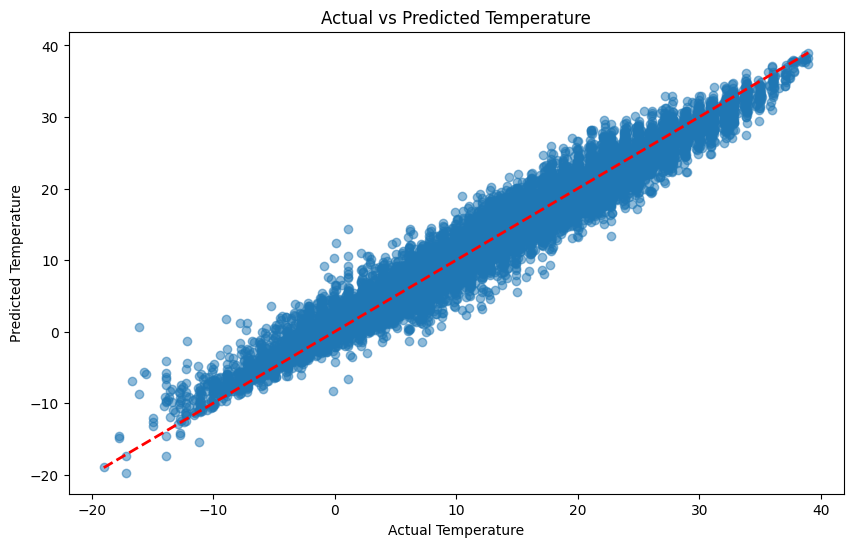

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(val_y, weather_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

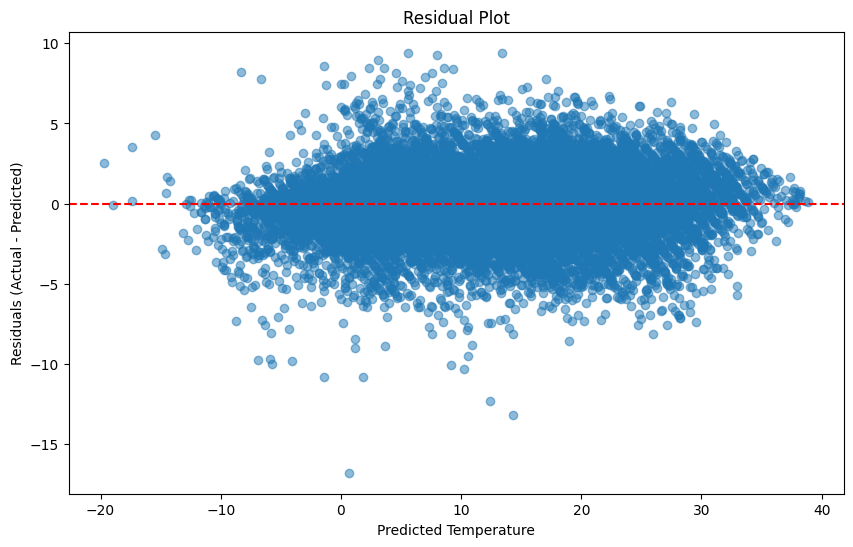

In [61]:
residuals = val_y - weather_preds

plt.figure(figsize=(10, 6))
plt.scatter(weather_preds, residuals, alpha=0.5)
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

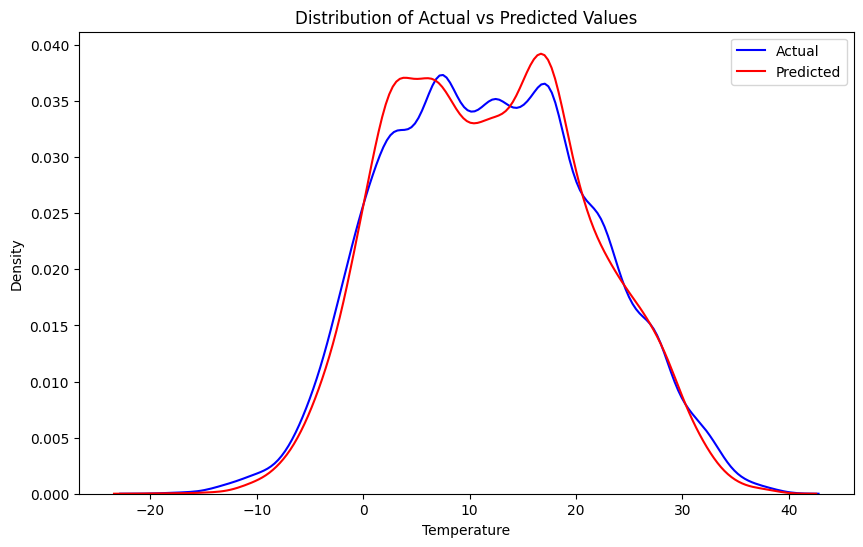

In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(val_y, label='Actual', color='blue')
sns.kdeplot(weather_preds, label='Predicted', color='red')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()